In [1]:
import os
from fastai.vision.all import *
from fastai.data.all import *
from fastai.vision.widgets import *

In [2]:
torch.cuda.set_device(6)

In [51]:
path = '/home/alao/ml/models_data/training_data'
len(os.listdir(path)), path

(2, '/home/alao/ml/models_data/training_data')

In [52]:
fnames = get_image_files(path)
fnames

(#880) [Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/1.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/10.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/100.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/101.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/102.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/103.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/104.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/105.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/106.png'),Path('/home/alao/ml/models_data/training_data/all_seg_healthy_sb/107.png')...]

(256, 256)

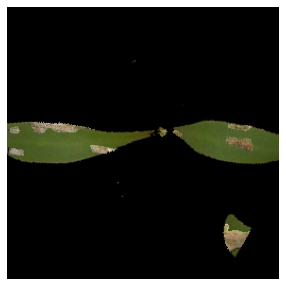

In [53]:
im = PILImage.create(fnames[800])
im.show()
im.size

# Build Datablocks and Train Model

In [54]:

plants = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    batch_tfms=aug_transforms())

In [55]:
dls = plants.dataloaders(path, bs=32)

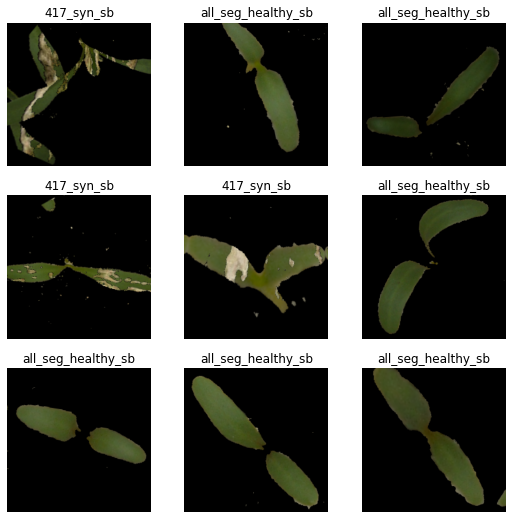

In [56]:
dls.show_batch()

# ResNet 34 Model used 417 healhy and syn images

In [57]:

learn_res34 = cnn_learner(dls, resnet34, metrics=(error_rate, accuracy))
learn_res34.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.583704,0.533629,0.159091,0.840909,00:05


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.237776,0.356928,0.102273,0.897727,00:05
1,0.180560,0.199144,0.062500,0.937500,00:06
2,0.139952,0.136595,0.062500,0.937500,00:06
3,0.115720,0.210473,0.062500,0.937500,00:06
4,0.093219,0.186105,0.062500,0.937500,00:07


In [39]:
learn_res34.save('resnet-34')

Path('models/resnet-34.pth')

In [51]:
learn_res34.export('resnet-34.pkl')

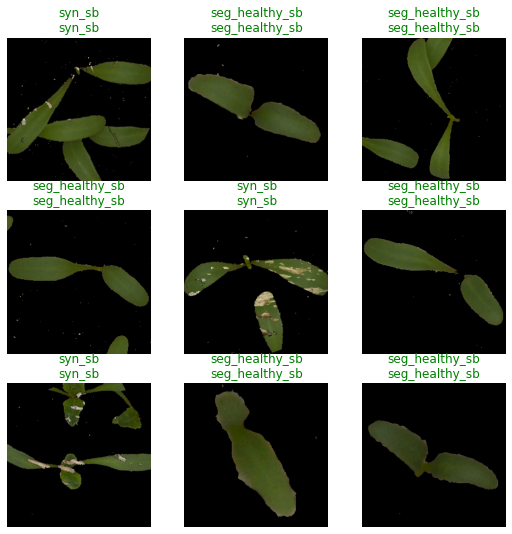

In [36]:
learn_res34.show_results()

# Evaluate Model

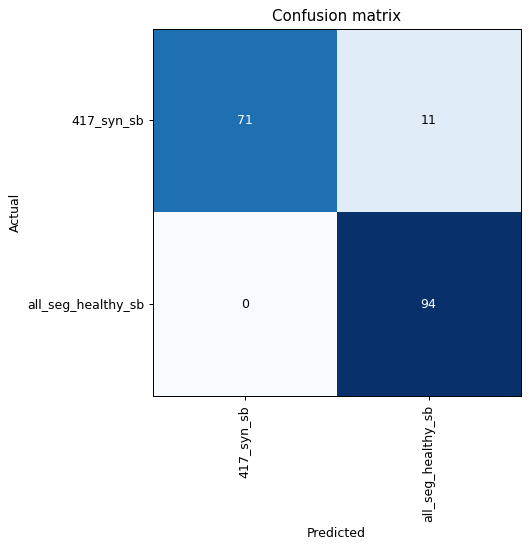

In [58]:

interp_res34 = ClassificationInterpretation.from_learner(learn_res34)
interp_res34.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [62]:
learn_res34.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                                                           
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
ReLU                      

# AlexNet Architecture

In [59]:

learn_alex = cnn_learner(dls, alexnet, metrics=(error_rate, accuracy))
learn_alex.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.574829,0.174649,0.062500,0.937500,00:04


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.291660,0.123243,0.039773,0.960227,00:05
1,0.210926,0.144539,0.039773,0.960227,00:04
2,0.201743,0.153283,0.051136,0.948864,00:04
3,0.161239,0.130464,0.051136,0.948864,00:04
4,0.142848,0.177989,0.051136,0.948864,00:04


In [13]:
learn_alex.save('alexnet')

Path('models/alexnet.pth')

In [50]:
learn_alex.export('alexnet.pkl')

# Evaluate Model

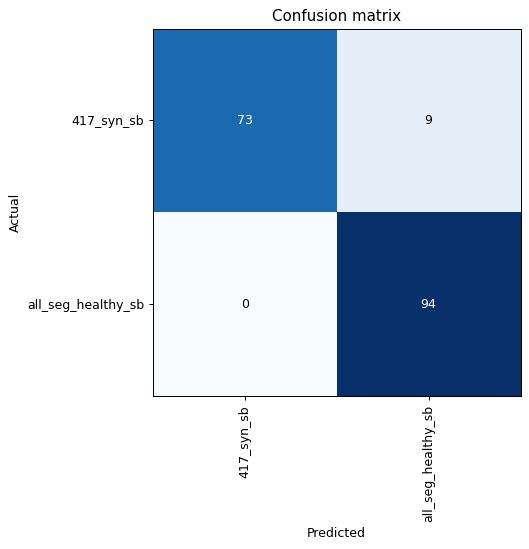

In [60]:

interp_alex = ClassificationInterpretation.from_learner(learn_alex)
interp_alex.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [61]:
learn_alex.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 63 x 63   
Conv2d                                    23296      True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 31 x 31   
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 192 x 31 x 31  
Conv2d                                    307392     True      
ReLU                                                           
____________________________________________________________________________
                     32 x 192 x 15 x 15  
MaxPool2d                                                      
____________________________________________________________________________
                     32 x 384 x

# ResNet 152 Architecture

In [63]:

learn_res152 = cnn_learner(dls, resnet152, metrics=(error_rate, accuracy))
learn_res152.fine_tune(5)

epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.432160,0.853541,0.142045,0.857955,00:16


epoch,train_loss,valid_loss,error_rate,accuracy,time
0,0.214841,1.346683,0.198864,0.801136,00:19
1,0.192356,0.402005,0.068182,0.931818,00:18
2,0.121947,0.202058,0.039773,0.960227,00:18
3,0.094671,0.337642,0.062500,0.937500,00:18
4,0.070954,0.382666,0.085227,0.914773,00:18


In [18]:
learn_res152.save('resnet-152')

Path('models/resnet-152.pth')

In [49]:
learn_res152.export('resnet-152.pkl')

# Evaluate Model

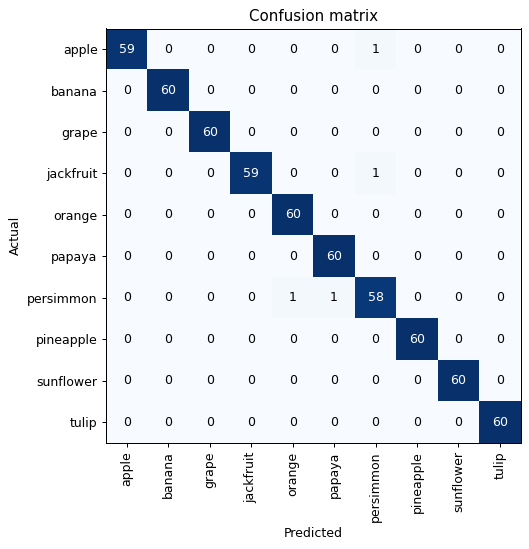

In [19]:

interp_res152 = ClassificationInterpretation.from_learner(learn_res152)
interp_res152.plot_confusion_matrix(dpi = 90,figsize = (6,6))

In [31]:
learn_res152.summary()

Sequential (Input shape: 32 x 3 x 256 x 256)
Layer (type)         Output Shape         Param #    Trainable 
                     32 x 64 x 128 x 128 
Conv2d                                    9408       True      
BatchNorm2d                               128        True      
ReLU                                                           
____________________________________________________________________________
                     32 x 64 x 64 x 64   
MaxPool2d                                                      
Conv2d                                    4096       True      
BatchNorm2d                               128        True      
Conv2d                                    36864      True      
BatchNorm2d                               128        True      
____________________________________________________________________________
                     32 x 256 x 64 x 64  
Conv2d                                    16384      True      
BatchNorm2d                        